## Изучение данных из файла

Для начала импортируем библиотеки, которые могут быть полезны или точно актуальны для нас.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 30)
pd.options.display.float_format = '{:.2f}'.format

Прочитав файл наблюдаем картину, что все данные скреились. Добавим параметр 'seb="\t"' (Разделитель знака табуляции).

In [ ]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.00,108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,False,False,25.00,nan,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,nan
1,7,3350000.00,40.40,2018-12-04T00:00:00,1,nan,11.00,18.60,1,NaN,False,False,11.00,2.00,посёлок Шушары,12817.00,18603.00,0.00,nan,0.00,nan,81.00
2,10,5196000.00,56.00,2015-08-20T00:00:00,2,nan,5.00,34.30,4,NaN,False,False,8.30,0.00,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00
3,0,64900000.00,159.00,2015-07-24T00:00:00,3,nan,14.00,nan,9,NaN,False,False,nan,0.00,Санкт-Петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424.00
4,2,10000000.00,100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,False,False,41.00,nan,Санкт-Петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121.00


Видим, что таблица отображается не полностью.

- Сброс ограничений на количество выводимых рядов
pd.set_option('display.max_rows', None)
 
- Сброс ограничений на число столбцов
pd.set_option('display.max_columns', None)
 
- Сброс ограничений на количество символов в записи
pd.set_option('display.max_colwidth', None)

Видим кучу пустых значений. Начнем предобработку данных. Глянем на общую инфу.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.00,9.86,5.68,0.00,6.00,9.00,14.00,50.00
last_price,23699.00,6541548.77,10887013.27,12190.00,3400000.00,4650000.00,6800000.00,763000000.00
total_area,23699.00,60.35,35.65,12.00,40.00,52.00,69.90,900.00
rooms,23699.00,2.07,1.08,0.00,1.00,2.00,3.00,19.00
ceiling_height,14504.00,2.77,1.26,1.00,2.52,2.65,2.80,100.00
floors_total,23613.00,10.67,6.60,1.00,5.00,9.00,16.00,60.00
living_area,21796.00,34.46,22.03,2.00,18.60,30.00,42.30,409.70
floor,23699.00,5.89,4.89,1.00,2.00,4.00,8.00,33.00
kitchen_area,21421.00,10.57,5.91,1.30,7.00,9.10,12.00,112.00
balcony,12180.00,1.15,1.07,0.00,0.00,1.00,2.00,5.00



- total_images — число фотографий квартиры в объявлении
- last_price — цена на момент снятия с публикации
- total_area — площадь квартиры в квадратных метрах (м²)
- first_day_exposition — дата публикации
- rooms — число комнат
- ceiling_height — высота потолков (м) (NaN)
- floors_total — всего этажей в доме (NaN)
- living_area — жилая площадь в квадратных метрах(м²) (NaN)
- floor — этаж
- is_apartment — апартаменты (булев тип) (NaN)
- studio — квартира-студия (булев тип)
- open_plan — свободная планировка (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²) (NaN)
- balcony — число балконов (NaN)
- locality_name — название населённого пункта (NaN)
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м) (NaN)
- cityCenters_nearest — расстояние до центра города (м) (NaN)
- parks_around3000 — число парков в радиусе 3 км (NaN)
- parks_nearest — расстояние до ближайшего парка (м) (NaN)
- ponds_around3000 — число водоёмов в радиусе 3 км (NaN)
- ponds_nearest — расстояние до ближайшего водоёма (м) (NaN)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия) (NaN)

Столбец даты и время нужно перевести в правилный тип данны. 
- (NaN) - это столбы где есть пропущенные значения .

### Вывод

После вывода общей инфы видим что надо делать для начала:
- исследовать пустые значения и понять на, что и где их заменить. 
- Заменить тип данный в столбцах.
- Найти дубликаты и обработать их.

## Предобработка данных

In [ ]:
def percent_omission(df):
    x = []
    for i in df.columns.tolist():
            percentage_omissions = df[i].isna().sum() / len(df)
            omissions = df[i].isna().sum()
            x.append({'Название таблицы': i, 'Пропуски': omissions, 'Доля пропусков': percentage_omissions})
    data = pd.DataFrame(x)
    data = data.style.format({'Доля пропусков': '{:.2%}'})
    return data

In [ ]:
percent_omission(df)

,Название таблицы,Пропуски,Доля пропусков
0,total_images,0,0.00%
1,last_price,0,0.00%
2,total_area,0,0.00%
3,first_day_exposition,0,0.00%
4,rooms,0,0.00%
5,ceiling_height,9195,38.80%
6,floors_total,86,0.36%
7,living_area,1903,8.03%
8,floor,0,0.00%
9,is_apartment,20924,88.29%


Вызвав метод isna() мы подсчитали пустые значения. Так же в названиях столбцов видим столбец 'cityCenters_nearest' с нарушением регистра. Изменим его, чтобы потом не получать ошибки. Затем приступим к замене пустых значений.

In [ ]:
df.columns = ['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition']

In [ ]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Нам предстоит много заменять значений. Напишем функцию замены.

In [ ]:
def mediana(name):
    median = df[name].median()
    df[name] = df[name].fillna(median)
    
    
def values(name, value):
    df[name] = df[name].fillna(value)

Начем с этих столбцов: 

**"ceiling_height" - высота потолка**

**"floors_total" - этажей в доме**

**"living_area" - жилая площадь** 

**- Причина появления NaN значений может быть, что люди писали прописью, а может быть техническая, что и для большенства столбцов.**
- Значения в столбце с высотой потолка чисто гипотетически можно заменить на медиану. Если взглянуть на долю строк с пустыми значениями, то они занимают 39% и это не маленькая цифра, она может повлиять на результат. Хорошо бы конечно уточнить у людей кто выгружал эти данные, на что, их заменять. Заменю на медиану. 
- В столбце "этажность дома" могу заменить значения на медиану так как их доля меньше 1% и на статистику сильно не повлияют.
- Значения в столбце "жилая площадь" заменить просто так нельзя, ведь площадь завист от стоимости, чем больше стоимость, тем больше площадь. Разделим на категории по суммам и потом исходя из категории заменим пропущенные значения на медиану.


Заменим NaN в первых двух столбцах. Действуем по плану "высота потолка": создаем новый столбец с медианной, а в старом изменяем на unknown. Во втором столбце просто заменяем на медиану.

In [ ]:
mediana('ceiling_height')
mediana('floors_total')
percent_omission(df)

,Название таблицы,Пропуски,Доля пропусков
0,total_images,0,0.00%
1,last_price,0,0.00%
2,total_area,0,0.00%
3,first_day_exposition,0,0.00%
4,rooms,0,0.00%
5,ceiling_height,0,0.00%
6,floors_total,0,0.00%
7,living_area,1903,8.03%
8,floor,0,0.00%
9,is_apartment,20924,88.29%


Делаю категоризацию с помощью метода cut() с настроеным шагом. Из меня программист ни какой(( по этому сделать задуманное я не могу, но идея такова, что бы автоматизировать рутину. Просто для более точного анализа я бы задал значения bins=np.linspace(0, 800000000, 100), но писать 100 категорий в ручную ... . Без понятия как это сделать через цикл , что бы он сам присваивал имя и менял лишь в имени цифру. 

In [ ]:
df['living_area_categor'] = pd.cut(df['last_price'], 
                                   bins=[0, 10000000, 100000000, 
                                         300000000, 500000000, 800000000],
                                   labels = ['up_to10', 'up_to100', 
                                             'up_to300', 'up_to500', 'up_to800']
                                  )
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_area_categor
0,20,13000000.00,108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,False,False,25.00,nan,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,nan,up_to100
1,7,3350000.00,40.40,2018-12-04T00:00:00,1,2.65,11.00,18.60,1,NaN,False,False,11.00,2.00,посёлок Шушары,12817.00,18603.00,0.00,nan,0.00,nan,81.00,up_to10
2,10,5196000.00,56.00,2015-08-20T00:00:00,2,2.65,5.00,34.30,4,NaN,False,False,8.30,0.00,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00,up_to10
3,0,64900000.00,159.00,2015-07-24T00:00:00,3,2.65,14.00,nan,9,NaN,False,False,nan,0.00,Санкт-Петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424.00,up_to100
4,2,10000000.00,100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,False,False,41.00,nan,Санкт-Петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121.00,up_to10


Теперь заменим NaN значения по категориям медианной.

In [ ]:
df['living_area'] = df.groupby('living_area_categor')['living_area'].apply(lambda x:
                                                                           x.fillna(x.median()))
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
living_area_categor         0
dtype: int64

В столбце "is_apartment" 20924 значений с NaN. Остальное это True и False. Заменяем все NaN на False, потому что, если нет значений значит нет апартаментов(так написанно в примере в балконами).

In [ ]:
values('is_apartment', False)
df['is_apartment'].isna().sum()

0

Заодно изменился тип на bool

In [ ]:
df['is_apartment'].dtypes

dtype('bool')

Столбец "площадь кухни" заменим на median

In [ ]:
mediana('kitchen_area')
df['kitchen_area'].isna().sum()

0

Следуем логике из описания - если NaN то значит нет балкона. Заменяем на 0.

In [ ]:
values('balcony', 0)
df['balcony'].isna().sum()

0

В названии населенного путнкта меняем NaN на unknown, т.к. рандомно писать, что за пункт это хуже того, что есть сейчас.

In [ ]:
values('locality_name', 'unknown')
df['locality_name'].isna().sum()

0

Растояние до аэропорта заменим на устредненные данные по медиане, так значения будут более точные, нежели чем заменить на простую мениану. 

In [ ]:
median = df.groupby('locality_name')['airports_nearest'].median().median()
df['airports_nearest'] = df['airports_nearest'].fillna(median)
df['airports_nearest'].isna().sum()

0

Расстояние до центра тоже заменим на усредненные данные по медиане. Тут вообще как бы 2 пути: либо у поселка-деревни нет центра, либо рассчитывают растояние до ближайшего центра другого города. По этому я пока сделаю следующее: объеденю города и выведу медиану до центра, а затем усредню данные и выведу медиану, так рассчет будет более устойчив и заменю NaN.

In [ ]:
median = df.groupby('locality_name')['city_centers_nearest'].median().median()
df['city_centers_nearest'] = df['city_centers_nearest'].fillna(median)
df['city_centers_nearest'].isna().sum()

0

Далее идут 4 похожих столбца и поэтому логика для них будет одинакова. Число водоёмов и парков может и не быть и именно по этой причине могут в этих столбцах стоять NaN. Из этого следует, что пропущенные значения это скорее всего число 0. Заменим число водоемов и парков на 0 и расстояние тоже.

In [ ]:
values('parks_around3000', 0)
values('parks_nearest', 0)
values('ponds_around3000', 0)
values('ponds_nearest', 0)

In [ ]:
df.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest           0
city_centers_nearest       0
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition         3181
living_area_categor        0
dtype: int64

In [ ]:
mx = df.days_exposition.max()
df.days_exposition = df.days_exposition.fillna(mx)

In [ ]:
df.isna().sum()

total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
city_centers_nearest    0
parks_around3000        0
parks_nearest           0
ponds_around3000        0
ponds_nearest           0
days_exposition         0
living_area_categor     0
dtype: int64

Везде пусто, отлично. Заменим в столбце "first_day_exposition" тип данных на datetime ведь это у нас столбец с датой.

In [ ]:
df['first_day_exposition']

0        2019-03-07T00:00:00
1        2018-12-04T00:00:00
2        2015-08-20T00:00:00
3        2015-07-24T00:00:00
4        2018-06-19T00:00:00
                ...         
23694    2017-03-21T00:00:00
23695    2018-01-15T00:00:00
23696    2018-02-11T00:00:00
23697    2017-03-28T00:00:00
23698    2017-07-21T00:00:00
Name: first_day_exposition, Length: 23699, dtype: object

In [ ]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
df.head(1)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_area_categor
0,20,13000000.00,108.00,2019-03-07,3,2.70,16.00,51.00,8,False,False,False,25.00,0.00,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,1580.00,up_to100


Далее заменим столбцы на целочисленные для удобства, но в столбцах **'total_area', 'ceiling_height', 'living_area', 'kitchen_area'** это столбцы прощади m2 и для точности данных оставим их с точкой. 

In [ ]:
columns = ['last_price', 'floors_total', 'balcony', 'airports_nearest', 'city_centers_nearest',
           'parks_around3000','parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition']
df[columns] = df[columns].astype('int')

In [ ]:
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_area_categor
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863,16028,1,482,2,755,1580,up_to100
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.60,1,False,False,False,11.00,2,посёлок Шушары,12817,18603,0,0,0,0,81,up_to10
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741,13933,1,90,2,574,558,up_to10
3,0,64900000,159.00,2015-07-24,3,2.65,14,60.00,9,False,False,False,9.10,0,Санкт-Петербург,28098,6800,2,84,3,234,424,up_to100
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,False,False,41.00,0,Санкт-Петербург,31856,8098,2,112,1,48,121,up_to10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.81,2017-03-21,3,3.70,5,73.30,3,False,False,False,13.83,0,Санкт-Петербург,24665,4232,1,796,3,381,1580,up_to10
23695,14,3100000,59.00,2018-01-15,3,2.65,5,38.00,4,False,False,False,8.50,0,Тосно,39231,28246,0,0,0,0,45,up_to10
23696,18,2500000,56.70,2018-02-11,2,2.65,3,29.70,1,False,False,False,9.10,0,село Рождествено,39231,28246,0,0,0,0,1580,up_to10
23697,13,11475000,76.75,2017-03-28,2,3.00,17,60.00,12,False,False,False,23.30,2,Санкт-Петербург,39140,10364,2,173,3,196,602,up_to100


Оптимизируем память в нашем датасете.

In [ ]:
def mem_usage(pandas_obj):
    if isinstance(pandas_obj,pd.DataFrame):
        usage_b = pandas_obj.memory_usage(deep=True).sum()
    else:
        usage_b = pandas_obj.memory_usage(deep=True)
    usage_mb = usage_b / 1024 ** 2
    return "{:03.2f} MB".format(usage_mb)

gl_int = df.select_dtypes(include=['int'])
converted_int = gl_int.apply(pd.to_numeric,downcast='unsigned')

print(mem_usage(gl_int))
print(mem_usage(converted_int))


compare_ints = pd.concat([gl_int.dtypes,converted_int.dtypes],axis=1)
compare_ints.columns = ['before','after']
compare_ints.apply(pd.Series.value_counts)

In [ ]:
gl_float = df.select_dtypes(include=['float'])
converted_float = gl_float.apply(pd.to_numeric,downcast='float')

print(mem_usage(gl_float))
print(mem_usage(converted_float))

compare_floats = pd.concat([gl_float.dtypes,converted_float.dtypes],axis=1)
compare_floats.columns = ['before','after']
compare_floats.apply(pd.Series.value_counts)

In [ ]:
optimized_gl = df.copy()

optimized_gl[converted_int.columns] = converted_int
optimized_gl[converted_float.columns] = converted_float

print(mem_usage(df))
print(mem_usage(optimized_gl))

In [ ]:
gl_obj = df.select_dtypes(include=['object']).copy()
gl_obj.describe()

In [ ]:
dow = gl_obj.locality_name
print(dow.head())

dow_cat = dow.astype('category')
print(dow_cat.head())

In [ ]:
dow_cat.head().cat.codes

In [ ]:
print(mem_usage(dow))
print(mem_usage(dow_cat))

In [ ]:
converted_obj = pd.DataFrame()

for col in gl_obj.columns:
    num_unique_values = len(gl_obj[col].unique())
    num_total_values = len(gl_obj[col])
    if num_unique_values / num_total_values < 0.5:
        converted_obj.loc[:,col] = gl_obj[col].astype('category')
    else:
        converted_obj.loc[:,col] = gl_obj[col]

In [ ]:
print(mem_usage(gl_obj))
print(mem_usage(converted_obj))

compare_obj = pd.concat([gl_obj.dtypes,converted_obj.dtypes],axis=1)
compare_obj.columns = ['before','after']
compare_obj.apply(pd.Series.value_counts)

In [ ]:
optimized_gl[converted_obj.columns] = converted_obj

mem_usage(optimized_gl)

In [ ]:
print('{:.0%}'.format(6.5 / 1.30))

На 500% я сэкономил память.

У нас есть столбец "locality_name". Посмотрим на его значения.

Заметил, что **поселок** написан через е и ё. Исправим.

In [ ]:
def test_name(name):
    count = 0
    for i in df['locality_name'].unique():
        if name in i:
            count += 1
    return count

In [ ]:
def search(name):
    x = []
    for i in df['locality_name']:
        if name in i:
            if i not in x:
                x.append(i)
    print('Количество совпадений {:.0f}'.format(len(x)))
    print()
    print(x)

In [ ]:
test_name('посёлок')

95

In [ ]:
df['locality_name'] = df['locality_name'].str.replace('ё', 'е')

In [ ]:
test_name('Мурино')

2

In [ ]:
df['locality_name'] = df['locality_name'].replace(['поселок Мурино', 'Мурино'], 'поселок Мурино')

In [ ]:
search('Мур')

Количество совпадений 1

['поселок Мурино']


In [ ]:
df.duplicated().sum()

0

## Рассчёты и добавление результатов в таблицу

**Посчитайте и добавьте в таблицу:**

1. цену квадратного метра;
2. день недели, месяц и год публикации объявления;
3. этаж квартиры; варианты — первый, последний, другой;
4. соотношение жилой и общей площади, а также отношение площади кухни к общей.

1 - Цена квадратного метра.

In [ ]:
df['price_per_square_meter'] = df.last_price / df.total_area

In [ ]:
df.price_per_square_meter = df.price_per_square_meter.astype('int')

2 - День недели. Месяц .Год публикации

In [ ]:
def day_week_year(df):
    value = df.first_day_exposition
    df['day'] = value.dt.weekday
    df['week'] = value.dt.month
    df['year'] = value.dt.year
    
    
day_week_year(df)

In [ ]:
df.loc[:, ['first_day_exposition', 'day', 'week', 'year']].head()

,first_day_exposition,day,week,year
0,2019-03-07,3,3,2019
1,2018-12-04,1,12,2018
2,2015-08-20,3,8,2015
3,2015-07-24,4,7,2015
4,2018-06-19,1,6,2018


3 - Категоризация этажей

In [ ]:
def floor(x):
    mina = df.floor.min()
    maxi = df.floor.max()
    if x == mina:
        return 'первый'
    if x == maxi:
        return 'последний'
    return 'другой'
df['floor_category'] = df['floor'].apply(floor)

In [ ]:
df.floor_category.value_counts()

другой       20781
первый        2917
последний        1
Name: floor_category, dtype: int64

4 - Подсчет доли жилого помещения и доли кухни.

In [ ]:
df['living_space'] = df['living_area'] / df['total_area']

In [ ]:
df['kitchen_space'] = df.kitchen_area / df.total_area

## Исследовательский анализ данных

Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.


### Площадь

In [ ]:
df.total_area.describe()

count   23699.00
mean       60.35
std        35.65
min        12.00
25%        40.00
50%        52.00
75%        69.90
max       900.00
Name: total_area, dtype: float64

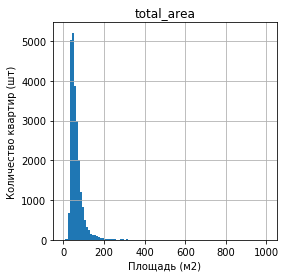

In [ ]:
axarr = df.hist('total_area', bins=100, range=(0, 1000), figsize = (4, 4))
for ax in axarr.flatten():
    ax.set_xlabel("Площадь (м2)")
    ax.set_ylabel("Количество квартир (шт)")

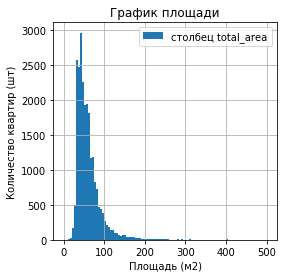

In [ ]:
ax = df["total_area"].plot.hist(label='столбец total_area', legend=True, range=(0, 500),
                                grid=True, bins=100, title='График площади', figsize=(4,4))
ax.set_xlabel('Площадь (м2)')
ax.set_ylabel('Количество квартир (шт)')
plt.show()

(0, 1000)

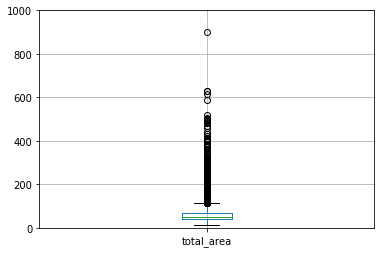

In [ ]:
df.boxplot('total_area')
plt.ylim(0, 1000)

Построил диаграмму, построил ящик с усами и вызвал метод describe для просмотра значений и выявления стандартного отклонения.
Гистограмма показала мне значения пика от 40 и до 70. Все что, дальше 250 уже практически единичные случаи, но ящик с усами нам показывает, что дальше 400 есть значения.
Метод describe доказывает и показывает стандартное отклоение от среднего арифметического на 35 значений, что говорит о серьезных аномалиях или выбросах которые мы наблюдаем на диаграмме размаха. Кстати гистаграмма похожа на распределение Пуассона. Меньше 20 это какие то очень крошечные лачуги-стаудии.

Отсикаем аномалии. В данном случаи с площадью у нас следующее: ящик с усами показывает, что есть значения и дальше чем за 400, но на гистограмме их уже не видно после  250. Т.к. их там мало я отрежу все что дальше 250.

In [ ]:
norm_area = df.query('total_area < 250')
print('Процент аномалий {:.1%}'.format((len(df) - len(norm_area))/len(df)))

Процент аномалий 0.5%


### Цена

In [ ]:
df.last_price.describe()

count       23699.00
mean      6541548.77
std      10887013.27
min         12190.00
25%       3400000.00
50%       4650000.00
75%       6800000.00
max     763000000.00
Name: last_price, dtype: float64

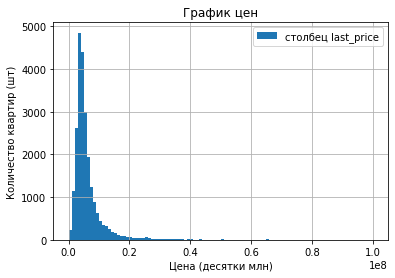

In [ ]:
ax = df.last_price.plot.hist(label='столбец last_price', legend=True, grid=True,
                             bins=100, title='График цен', range=(0, 100000000))
ax.set_xlabel('Цена (десятки млн)')
ax.set_ylabel('Количество квартир (шт)')
plt.show()

(0, 1000000)

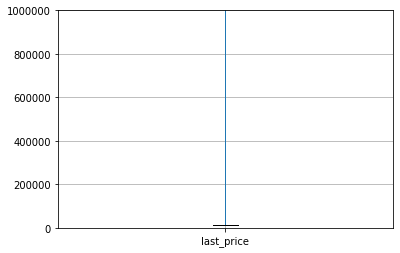

In [ ]:
df.boxplot('last_price')
plt.ylim(0,1000000)

Метод describe позволяет видеть все значения которые нам нужны. Тут график распределения нормальный и пик где то от 3 до 5 миллионов. Все, что выше 100млн есть значения. Очень много аномалий. Проверим прежде чем фильтровать.

In [ ]:
df[df.last_price <= 500000].sort_values(by='last_price', ascending=True).head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_area_categor,price_per_square_meter,day,week,year,floor_category,living_space,kitchen_space
8793,7,12190,109.00,2019-03-20,2,2.75,25,32.00,25,False,False,False,40.50,0,Санкт-Петербург,36421,9176,1,805,0,0,8,up_to10,111,2,3,2019,другой,0.29,0.37
14911,5,430000,54.00,2018-06-26,2,2.65,3,29.00,3,False,False,False,9.10,0,поселок станции Свирь,39231,28246,0,0,0,0,44,up_to10,7962,1,6,2018,другой,0.54,0.17
17456,7,430000,30.40,2019-04-22,1,2.65,2,16.00,1,False,False,False,6.00,0,Сланцы,39231,28246,0,0,0,0,1580,up_to10,14144,0,4,2019,первый,0.53,0.20
16274,18,440000,40.00,2018-07-10,1,2.65,5,29.00,1,False,False,False,9.10,0,деревня Старополье,39231,28246,0,0,0,0,45,up_to10,11000,1,7,2018,первый,0.72,0.23
5698,7,450000,42.00,2017-07-31,2,2.65,1,23.00,1,False,False,False,5.80,0,городской поселок Будогощь,39231,28246,0,0,0,0,233,up_to10,10714,0,7,2017,первый,0.55,0.14


Видим аномалию. избавимся от нее и редких значений которые за 40 млн.

In [ ]:
norm_price = df.query('last_price > last_price.min() and last_price < 40000000')
print('Доля аномалий {:.2%}'.format((len(df)-len(norm_price))/len(df)))

Доля аномалий 0.82%


<div class="alert alert-block alert-success">
Очень здорово, что считаешь % аномалий

### Число комнат

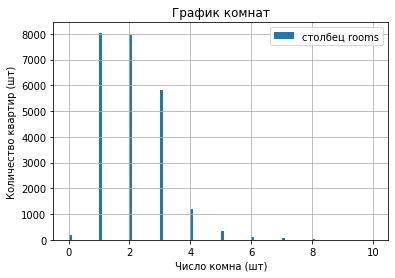

In [ ]:
ax = df.rooms.plot.hist(label='столбец rooms', legend=True, grid=True,
                             bins=100, title='График комнат', range=(0, 10))
ax.set_xlabel('Число комна (шт)')
ax.set_ylabel('Количество квартир (шт)')
plt.show()

Видим значения 0. Видимо это студии

In [ ]:
df[df.rooms == 0].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_area_categor,price_per_square_meter,day,week,year,floor_category,living_space,kitchen_space
144,1,2450000,27.00,2017-03-30,0,2.65,24,15.50,2,False,True,False,9.10,2,поселок Мурино,39231,28246,0,0,0,0,181,up_to10,90740,3,3,2017,другой,0.57,0.34
349,4,2320000,25.00,2017-09-27,0,2.65,14,17.00,1,False,False,True,9.10,0,деревня Кудрово,39231,28246,0,0,0,0,45,up_to10,92800,2,9,2017,первый,0.68,0.36
440,8,2480000,27.11,2018-03-12,0,2.65,17,24.75,4,False,True,False,9.10,2,Санкт-Петербург,38171,15015,0,0,2,982,64,up_to10,91479,0,3,2018,другой,0.91,0.34
508,0,3375000,34.40,2017-03-28,0,2.65,26,24.30,19,False,False,True,9.10,1,поселок Парголово,53115,19292,0,0,1,593,430,up_to10,98110,1,3,2017,другой,0.71,0.26
608,2,1850000,25.00,2019-02-20,0,2.65,10,29.00,7,False,True,False,9.10,0,поселок Шушары,39231,28246,0,0,0,0,29,up_to10,74000,2,2,2019,другой,1.16,0.36


Нет. это какая то аномалия, придется их отбросить для корректных данных т.к. мы видим в столбце "studio" есть как True так и False.

In [ ]:
df.rooms.describe()

count   23699.00
mean        2.07
std         1.08
min         0.00
25%         1.00
50%         2.00
75%         3.00
max        19.00
Name: rooms, dtype: float64

(1, 10)

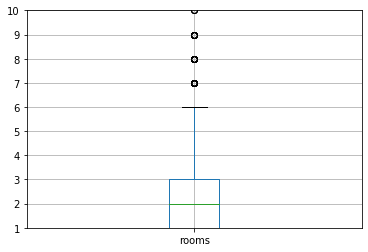

In [ ]:
df.boxplot('rooms')
plt.ylim(1, 10)

Пик у нас 1-2 комнаты. Видими 0 значение и стандартное отклонение не оч большое, что говорит о малом количестве выбросов. Тип распределения Пуассона.

- Отбросим 0 комнат т.к. это аномалия и все, что больше 8-10 комнат, там очень мало значений.

In [ ]:
norm_rooms = df.query('rooms >= 1 and rooms <= 8')
norm_rooms.rooms.value_counts()

1    8047
2    7940
3    5814
4    1180
5     326
6     105
7      59
8      12
Name: rooms, dtype: int64

In [ ]:
print('Доля аномалий {:.2%}'.format((len(df)-len(norm_rooms))/len(df)))

Доля аномалий 0.91%


### Высота потолков.

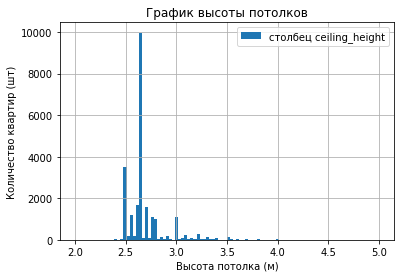

In [ ]:
ax = df.ceiling_height.plot.hist(label='столбец ceiling_height', legend=True, grid=True,
                             bins=100, title='График высоты потолков', range=(2, 5))
ax.set_xlabel('Высота потолка (м)')
ax.set_ylabel('Количество квартир (шт)')
plt.show()

In [ ]:
df.ceiling_height.describe()

count   23699.00
mean        2.72
std         0.99
min         1.00
25%         2.60
50%         2.65
75%         2.70
max       100.00
Name: ceiling_height, dtype: float64

(-3.95, 104.95)

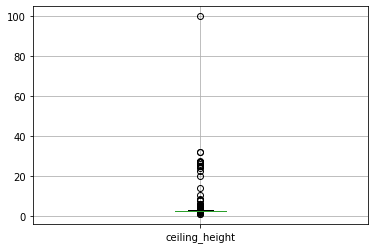

In [ ]:
df.boxplot('ceiling_height')
plt.ylim()

Явно потолок в 100 м это какая то башня. Явно лишнее значение. Пик на 2.65. Тип графика Пуасонна.

In [ ]:
norm_ceiling = df.query('ceiling_height >= 2.5 and ceiling_height <= 5')
print('Доля аномалий {:.2%}'.format((len(df)-len(norm_ceiling))/len(df)))

Доля аномалий 0.46%


## Задачи:

### "Изучите время продажи квартиры. 

**Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"**

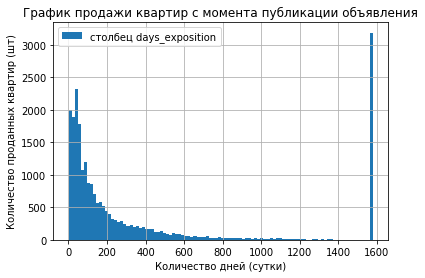

In [ ]:
ax = df.days_exposition.plot.hist(label='столбец days_exposition', legend=True, grid=True,
                             bins=100, title='График продажи квартир с момента публикации объявления',)
ax.set_xlabel('Количество дней (сутки)')
ax.set_ylabel('Количество проданных квартир (шт)')
plt.show()

In [ ]:
print('Среднее время продажи:', df.days_exposition.mean())
print('Медиана времени продажи:', df.days_exposition.median())

Среднее время продажи: 368.68445925988436
Медиана времени продажи: 124.0


Видим большой отрыв у среднего чила. Это связанно с тем, что мы заменили пропущенные значения мах числом так как эти кв еще не продали. Можно отрезать эти данные и взглянуть без них.

In [ ]:
test = df.query('days_exposition < 1400')
print('Среднее время продажи:', test.days_exposition.mean())
print('Медиана времени продажи:', test.days_exposition.median())

Среднее время продажи: 179.68427728181862
Медиана времени продажи: 95.0


Теперь видно среднее и медиану. На них больше не влияют непроданные объявления.

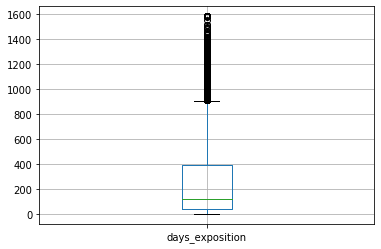

In [ ]:
df.boxplot('days_exposition')

In [ ]:
df.days_exposition.describe()

count   23699.00
mean      368.68
std       518.93
min         1.00
25%        45.00
50%       124.00
75%       390.00
max      1580.00
Name: days_exposition, dtype: float64

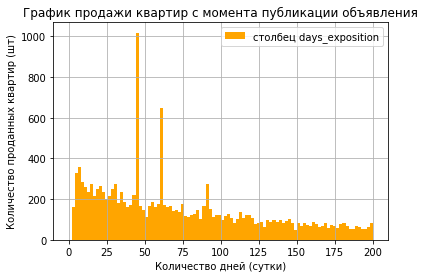

In [ ]:
ax = df.days_exposition.plot.hist(label='столбец days_exposition', legend=True, grid=True,
                             bins=100, title='График продажи квартир с момента публикации объявления',
                                  range=(0,200), color='orange')
ax.set_xlabel('Количество дней (сутки)')
ax.set_ylabel('Количество проданных квартир (шт)')
plt.show()

**- Когда можно считать, что продажи квартиры прошли очень быстро ?**

Мое мнение - это когда с момента выставления объявления прошло наименьшее количество дней по сравнению с другими объявлениями. Хотя на продажу влияет цена, расположение и наличие денег у клиента на жилье. Я свел до минимума дней что бы посмотреть пик продаж и видим от 1 до 50 это прям быстрые продажи. Сделаем срез и посмотрим на топ 10 кв которые быстро купили.

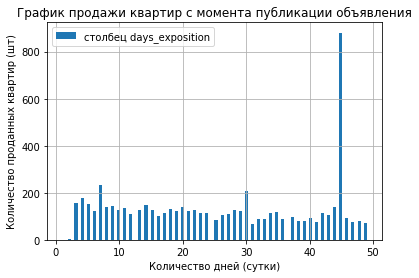

In [ ]:
fast_apartaments = df.query('days_exposition < 50')
ax = fast_apartaments.days_exposition.plot.hist(label='столбец days_exposition', legend=True, grid=True,
                             bins=100, title='График продажи квартир с момента публикации объявления')
ax.set_xlabel('Количество дней (сутки)')
ax.set_ylabel('Количество проданных квартир (шт)')
plt.show()

In [ ]:
fast_apartaments.days_exposition.sort_values(ascending=True).head(10)

1632     1
16053    2
16212    2
13061    2
10451    3
19693    3
11793    3
5240     3
12093    3
5230     3
Name: days_exposition, dtype: int64

Можно взглянуть на то, где их купили и сколько метром от центра.

In [ ]:
fast_apartaments[['days_exposition',
                'locality_name',
                'city_centers_nearest'
                ]].sort_values(by='days_exposition', ascending=True).head(10)

,days_exposition,locality_name,city_centers_nearest
1632,1,Санкт-Петербург,14384
16053,2,Санкт-Петербург,11668
16212,2,Санкт-Петербург,10302
13061,2,Санкт-Петербург,9389
10451,3,Санкт-Петербург,11486
19693,3,Санкт-Петербург,16921
11793,3,Санкт-Петербург,12430
5240,3,Санкт-Петербург,10602
12093,3,Санкт-Петербург,14255
5230,3,Санкт-Петербург,16094


In [ ]:
print('Среднее растояние до центра у топ 10:', fast_apartaments.city_centers_nearest.mean())

Среднее растояние до центра у топ 10: 18176.981078072826


Видим, что это крупынй город Санкт-петербург и среднее до центра 12км.

**- Когда продажи прошли необычно долго?**

Интересно узнать кто как считает, что для них необычно долго. Для меня необычно долго это уже дня 3-4. Т.к. я только новичек и даже интеренет не может мне ответить на этот впорос предположу,что необычно долгая продажа это все та которая длилась, ну больше года. На это могло повлиять многое, как минимум самые лучше квартиры были куплены и стались так себе варианты, при том, что деньги у людей были. Если посмотреть на гистограмму, все что дальше 700 дней это уже единичные случаи и этот промежуток можно взять как самые долгие.

А можно сделать легче, вывести топ 10 с конца, отрезав те квартиры которые не продали.

In [ ]:
long_time = df.query('days_exposition != days_exposition.max()')
long_time[['days_exposition',
            'locality_name',
            'city_centers_nearest'
            ]].sort_values(by='days_exposition', ascending=False).head(10)

,days_exposition,locality_name,city_centers_nearest
1109,1572,Санкт-Петербург,318
9553,1553,Санкт-Петербург,17110
1885,1513,Санкт-Петербург,11096
6691,1512,Пушкин,30358
20969,1512,Санкт-Петербург,5032
14093,1497,Санкт-Петербург,4798
15313,1489,Сестрорецк,35515
19123,1485,Павловск,34619
11955,1484,Санкт-Петербург,11096
4736,1477,Санкт-Петербург,1724


Видим большенство Санкт-Петербург, а так есть более мелкие города. Видимо в Питере эти квартиры слишком дорогие из-за близости к центру или просто в других городах далеко и не удобное расположенние дома, по этому покупатель так долго их покупал =)

### "Изучите время продажи квартиры. 

**Какие факторы больше всего влияют на стоимость квартиры?**

- Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.

**1. Зависит ли цена от площади квартиры?**  
Если выводить отфильтрованную таблицу по площади и цене, то цена зависит и очень сильно от площади, но после 150 м2 зависимость пропадает из-за того, что количество таких квартир меньше, а цена на них очень сильно гуляет, даже есть аномальный пик 300-350 млн.

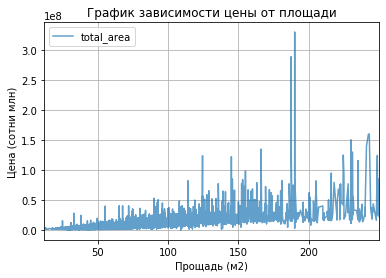

In [ ]:
norm_area.query('last_price < 400000000').sort_values('total_area').plot(x='total_area', 
                                                                         y='last_price', 
                                                                         label='total_area', 
                                                                         legend=True, 
                                                                         grid=True,
                                                                         title='График зависимости цены от площади',
                                                                         style='-', alpha=0.7)
plt.xlabel('Прощадь (м2)')
plt.ylabel('Цена (сотни млн)')
plt.show()

In [ ]:
norm_area.total_area.corr(norm_area.last_price)

0.6698449055566107

In [ ]:
norm_area.query('total_area > 150').total_area.corr(norm_area.last_price)

0.23534676817556735

**2. Зависит ли цена от числа комнат**  
Зависимость есть. Цена растет до 3 комнат, затем снижается, что нам и показывает коэффициент Пирсона.

In [ ]:
rooms_old = norm_rooms.pivot_table(index='rooms', values='last_price', aggfunc=['median'])
rooms_old.columns = ['price_median_rooms']
rooms_old['id'] = rooms_old.index

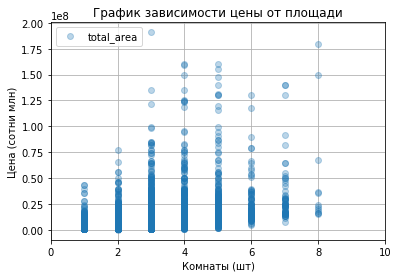

In [ ]:
norm_rooms.query('last_price < 200000000').plot(x='rooms', y='last_price', label='total_area', 
                                                legend=True, grid=True, 
                                                title='График зависимости цены от площади',
                                               style='o', xlim=(0, 10), alpha=0.3)
plt.xlabel('Комнаты (шт)')
plt.ylabel('Цена (сотни млн)')
plt.show()
y = norm_rooms.query('rooms < 8 and last_price < 100000000').rooms.corr(norm_price['last_price'])

In [ ]:
norm_rooms.query('rooms > 4 and last_price < 100000000').rooms.corr(norm_price['last_price'])

0.28580178194643824

**3. ЗАвисит ли цена квартиры от близости к центру**  
Тут мы набрюдаем отрицательную корреляцию и как бы это логичено, чем дальше мы от центра, тем дешевле. Пик самый это 5км, но чем дальше, тем дешевле.

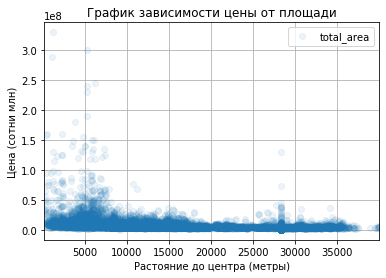

-0.4538799731259765

In [ ]:
city_centers_nearest_old = norm_rooms.query('last_price < 400000000 and city_centers_nearest < 40000').plot(
                                                      x='city_centers_nearest', 
                                                      y='last_price', 
                                                      label='total_area', 
                                                      legend=True, grid=True, 
                                                      title='График зависимости цены от площади',
                                                      style='o', alpha=0.08)
plt.xlabel('Растояние до центра (метры)')
plt.ylabel('Цена (сотни млн)')
plt.show()
norm_rooms.city_centers_nearest.corr(norm_price['last_price'])

In [ ]:
norm_rooms.query('city_centers_nearest < 40000 and last_price < 50000000').city_centers_nearest.corr(norm_price['last_price'])

-0.4770836305306643

**4. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом**

Видими, что последний этаж у нас аномальный и все нам портит . Уберем его для точности данных.

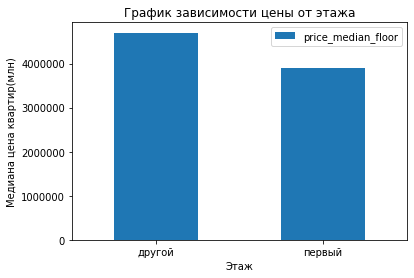

In [ ]:
price_median_floor = norm_price.query('floor_category != "последний"').pivot_table(
                                                                        index='floor_category', 
                                                                        values='last_price', 
                                                                        aggfunc=['median']
                                                                                    )
price_median_floor.columns = ['price_median_floor']
price_median_floor.plot(y='price_median_floor', kind ='bar', 
                        title='График зависимости цены от этажа',
                       rot=0)
plt.xlabel('Этаж')
plt.ylabel('Медиана цена квартир(млн)')
plt.show()

Вот теперь видно что цена других этажей выше чем у первых.

**5. Зависимость от времени.**

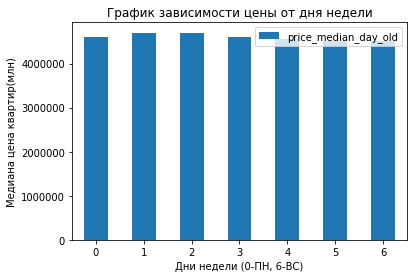

In [ ]:
day_old = norm_price.pivot_table(index='day', values='last_price', aggfunc=['median', 'count'])
day_old.columns = ['price_median_day_old', 'count']
day_old.plot(y='price_median_day_old', kind ='bar', title='График зависимости цены от дня недели', rot=0)
plt.xlabel('Дни недели (0-ПН, 6-ВС)')
plt.ylabel('Медиана цена квартир(млн)')
plt.show()

In [ ]:
day_old

,price_median_day_old,count
day,,
0,4600000,3580
1,4700000,4150
2,4700000,3951
3,4600000,4252
4,4550000,3969
5,4500000,1914
6,4500000,1688


Зависимость от дней недели +- одинакова.

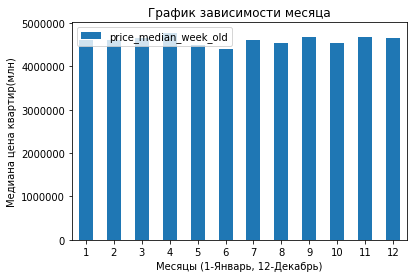

In [ ]:
week_old = norm_price.pivot_table(index='week', values='last_price', aggfunc=['median', 'count'])
week_old.columns = ['price_median_week_old', 'count']
week_old.plot(y='price_median_week_old', kind ='bar', title='График зависимости месяца', rot=0)
plt.xlabel('Месяцы (1-Январь, 12-Декабрь)')
plt.ylabel('Медиана цена квартир(млн)')
plt.show()

In [ ]:
week_old

,price_median_week_old,count
week,,
1,4600000,1488
2,4615000,2616
3,4650000,2571
4,4779507,2358
5,4500000,1263
6,4400000,1743
7,4600000,1676
8,4550000,1735
9,4670000,1965


Разрыв хоть небольшой, но в 4 месяце дороже всех квартиры.

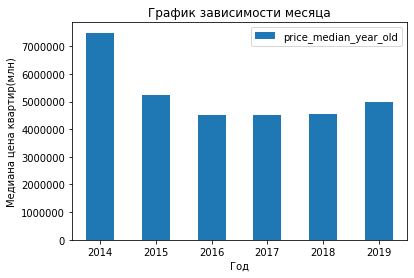

In [ ]:
year_old = norm_price.pivot_table(index='year', values='last_price', aggfunc=['median', 'count'])
year_old.columns = ['price_median_year_old', 'count']
year_old.plot(y='price_median_year_old', kind ='bar', title='График зависимости месяца', rot=0)
plt.xlabel('Год')
plt.ylabel('Медиана цена квартир(млн)')
plt.show()

In [ ]:
year_old

,price_median_year_old,count
year,,
2014,7488280,130
2015,5250000,1164
2016,4500000,2751
2017,4500000,8116
2018,4550000,8486
2019,5000000,2857


Самые дорогие квартиры были в 2014. Чем старше год тем меньше медиана, но тем больше предложений на рынке.

### Выберите 10 населённых пунктов с наибольшим числом объявлений.

**Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите среди них населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце 'locality_name'.**

1. Топ 10 городов с наибольшим числом объявлений.

In [ ]:
top = df.query('locality_name != "unknown"').groupby('locality_name')['days_exposition'].count()
top = top.sort_values(ascending=False).head(10)
top

locality_name
Санкт-Петербург      15721
поселок Мурино         590
поселок Шушары         440
Всеволожск             398
Пушкин                 369
Колпино                338
поселок Парголово      327
Гатчина                307
деревня Кудрово        299
Выборг                 237
Name: days_exposition, dtype: int64

2. Средняя цена за м2 в этих населенных пунтктах.

In [ ]:
mean_m2 = norm_area.query('locality_name in @top.index').groupby('locality_name')['price_per_square_meter'].mean()
mean_m2.sort_values(ascending=False)

locality_name
Санкт-Петербург     114051.69
Пушкин              103130.41
деревня Кудрово      92473.09
поселок Парголово    90175.49
поселок Мурино       86087.06
поселок Шушары       78676.90
Колпино              75332.87
Гатчина              68745.69
Всеволожск           68654.01
Выборг               58141.49
Name: price_per_square_meter, dtype: float64

3. Hаселённые пункты с самой высокой и низкой стоимостью жилья

In [ ]:
max_price = norm_price.query('locality_name in @top.index').groupby('locality_name')['last_price'].max()
max_price.sort_values(ascending=False)

locality_name
Санкт-Петербург      39990000
Колпино              36900000
Пушкин               35000000
Всеволожск           24412900
Выборг               19990000
Гатчина              13900000
деревня Кудрово      13000000
поселок Шушары       10990000
поселок Парголово     9140000
поселок Мурино        8500000
Name: last_price, dtype: int64

In [ ]:
min_price = norm_price.query('locality_name in @top.index').groupby('locality_name')['last_price'].min()
min_price.sort_values(ascending=True)

locality_name
Выборг                600000
Гатчина               850000
Всеволожск            965780
Санкт-Петербург      1190000
поселок Парголово    1400000
поселок Шушары       1500000
поселок Мурино       1730000
деревня Кудрово      1800000
Пушкин               1990000
Колпино              2100000
Name: last_price, dtype: int64

### Изучите предложения квартир: 
**для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге ('locality_name'). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона.**

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
spb_hous = norm_price[df['locality_name'] == "Санкт-Петербург"]
spb_hous['city_centers_nearest_km'] = spb_hous['city_centers_nearest'] / 1000
spb_hous['city_centers_nearest_km'] = spb_hous['city_centers_nearest_km'].astype('int')
spb_hous.head(2)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_area_categor,price_per_square_meter,day,week,year,floor_category,living_space,kitchen_space,city_centers_nearest_km
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863,16028,1,482,2,755,1580,up_to100,120370,3,3,2019,другой,0.47,0.23,16
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741,13933,1,90,2,574,558,up_to10,92785,3,8,2015,другой,0.61,0.15,13



<div class="alert alert-block alert-warning">
    
Такие предупрежденияя пандаса можно отключить
    
    import warnings
    warnings.filterwarnings("ignore")

In [ ]:
spb_hous['one_km_price'] = spb_hous['last_price'] / spb_hous['city_centers_nearest_km']

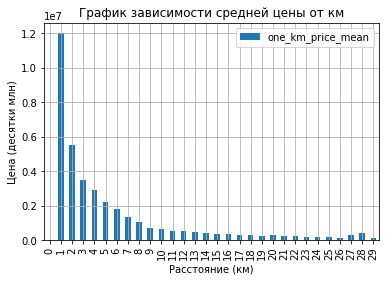

In [ ]:
new_table = spb_hous.pivot_table(index='city_centers_nearest_km',
                                                values='one_km_price', aggfunc='mean')
new_table.columns = ['one_km_price_mean']
new_table['km'] = new_table.index
new_table.plot(x='km', y='one_km_price_mean', title='График зависимости средней цены от км',kind='bar', grid=True)
plt.xlabel('Расстояние (км)')
plt.ylabel('Цена (десятки млн)')
plt.show()

In [ ]:
new_table.head()

,one_km_price_mean,km
city_centers_nearest_km,,
0,inf,0
1,12016035.87,1
2,5531472.57,2
3,3457090.95,3
4,2918783.88,4


График похож на распределение Пуассона и резко меняется уже после 1км, соотвественно все, что меньше 2 км это центр.

In [ ]:
spb_hous.query('city_centers_nearest_km < 2').sort_values('last_price', ascending=False).head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_area_categor,price_per_square_meter,day,week,year,floor_category,living_space,kitchen_space,city_centers_nearest_km,one_km_price
282,17,37000000,115.00,2018-11-15,2,2.65,5,65.00,2,False,False,False,14.00,0,Санкт-Петербург,23537,1995,2,121,2,663,158,up_to100,321739,3,11,2018,другой,0.57,0.12,1,37000000.00
17203,2,35300000,235.00,2018-11-15,8,4.00,4,162.00,3,False,False,False,26.00,0,Санкт-Петербург,19728,1799,3,123,3,50,7,up_to100,150212,3,11,2018,другой,0.69,0.11,1,35300000.00
10576,4,35000000,155.00,2018-11-18,4,2.50,5,80.00,3,False,False,False,30.00,0,Санкт-Петербург,21887,573,0,0,2,42,82,up_to100,225806,6,11,2018,другой,0.52,0.19,0,inf
11438,26,34979000,198.00,2017-11-23,5,2.65,5,147.00,3,False,False,False,16.00,0,Санкт-Петербург,20767,1085,3,542,2,126,90,up_to100,176661,3,11,2017,другой,0.74,0.08,1,34979000.00
1109,1,34878556,95.80,2014-12-09,2,2.65,6,58.30,5,True,False,False,20.00,1,Санкт-Петербург,21860,318,2,160,3,569,1572,up_to100,364076,1,12,2014,другой,0.61,0.21,0,inf


### Выделите сегмент квартир в центре. 
**Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?**

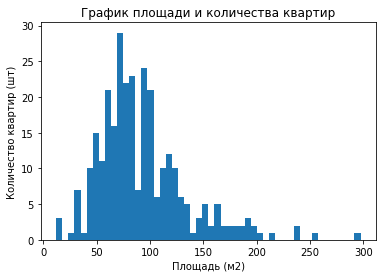

In [ ]:
center = spb_hous.query('city_centers_nearest_km < 2')
center.total_area.plot.hist(bins=50)
plt.title('График площади и количества квартир')
plt.xlabel('Площадь (м2)')
plt.ylabel('Количество квартир (шт)')
plt.show()

In [ ]:
center.total_area.describe()

count   295.00
mean     92.53
std      42.01
min      12.00
25%      65.00
50%      83.00
75%     110.20
max     297.50
Name: total_area, dtype: float64

Пик площади 83м2

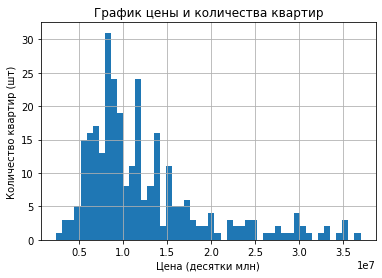

In [ ]:
center.last_price.hist(bins=50)
plt.title('График цены и количества квартир')
plt.xlabel('Цена (десятки млн)')
plt.ylabel('Количество квартир (шт)')
plt.show()

Пик цены где то 8-10млн

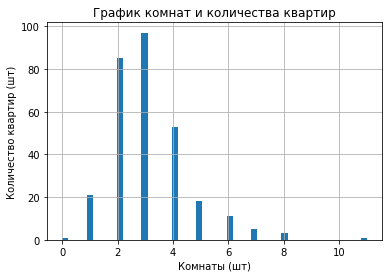

In [ ]:
center.rooms.hist(bins=50)
plt.title('График комнат и количества квартир')
plt.xlabel('Комнаты (шт)')
plt.ylabel('Количество квартир (шт)')
plt.show()

больше всего квартир где 2 и 3 комнаты.

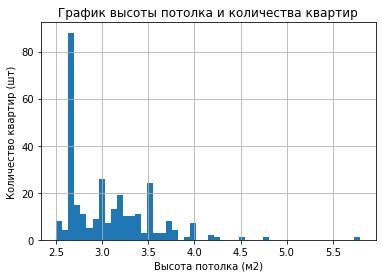

In [ ]:
center.ceiling_height.hist(bins=50)
plt.title('График высоты потолка и количества квартир')
plt.xlabel('Высота потолка (м2)')
plt.ylabel('Количество квартир (шт)')
plt.show()

Пик потолков 2.6 где то.

### Что влияет на стоимость квартиры.

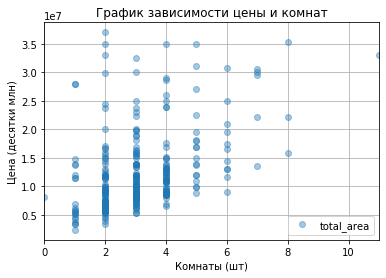

0.18026789969493387

In [ ]:
center.sort_values('rooms').plot(x='rooms', 
                                 y='last_price', 
                                 label='total_area', 
                                 legend=True, grid=True,
                                 title='График зависимости цены и комнат',
                                 style='o', 
                                 alpha=0.4)
plt.xlabel('Комнаты (шт)')
plt.ylabel('Цена (десятки млн)')
plt.show()
center.query('rooms > 1 and rooms < 5').rooms.corr(center['last_price'])

В пределах от 2 и до 4 комнат цена не сильно то и отличаются.

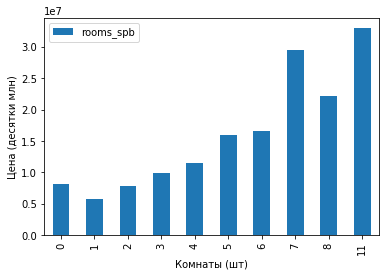

0.44163894981901886

In [ ]:
rooms_spb = center.pivot_table(index='rooms', values='last_price', aggfunc=['median'])
rooms_spb.columns = ['rooms_spb']
rooms_spb['id'] = rooms_spb.index
rooms_spb.plot(y='rooms_spb', kind='bar')
plt.xlabel('Комнаты (шт)')
plt.ylabel('Цена (десятки млн)')
plt.show()
center.rooms.corr(center.last_price)

Стоимость квартиры растет от количества комнат.

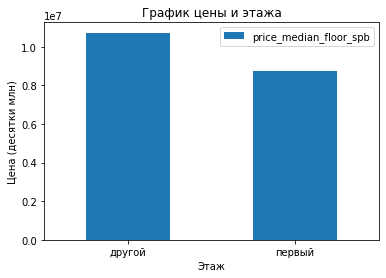

In [ ]:
price_median_floor_spb = center.pivot_table(index='floor_category', 
                                        values='last_price', aggfunc=['median', 'count'])
price_median_floor_spb.columns = ['price_median_floor_spb', 'count']
price_median_floor_spb.plot(y='price_median_floor_spb', kind='bar', rot=0, title='График цены и этажа')
plt.xlabel('Этаж')
plt.ylabel('Цена (десятки млн)')
plt.show()

In [ ]:
price_median_floor_spb

,price_median_floor_spb,count
floor_category,,
другой,10735000,246
первый,8750000,49


Видно, что другой этаж преобладает.

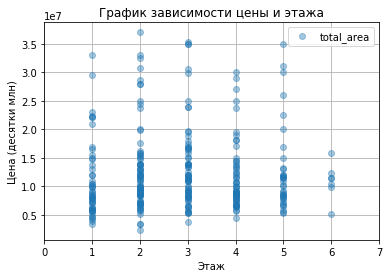

0.015382680858173299

In [ ]:
center.plot(x='floor', y='last_price', label='total_area', legend=True, grid=True,
            title='График зависимости цены и этажа', style='o', alpha=0.4, xlim=(0, 7))
plt.xlabel('Этаж')
plt.ylabel('Цена (десятки млн)')
plt.show()
center.floor.corr(center['last_price'])

Но зависимости от этажа почти 0.

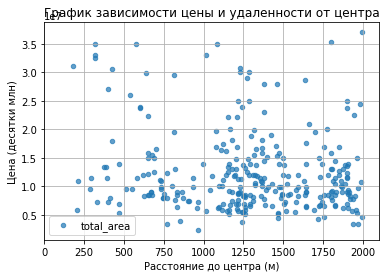

-0.16368446332301126

In [ ]:
city_centers_nearest_spb = center.plot(x='city_centers_nearest', y='last_price', label='total_area', legend=True, grid=True,
            title='График зависимости цены и удаленности от центра', kind='scatter', 
            alpha=0.7, xlim=(0, 2100))
plt.xlabel('Расстояние до центра (м)')
plt.ylabel('Цена (десятки млн)')
plt.show()
center.city_centers_nearest.corr(center.last_price)

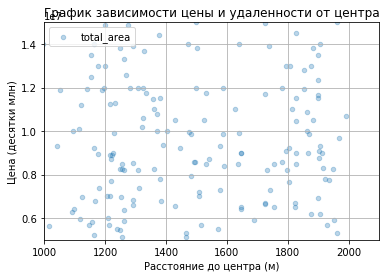

In [ ]:
city_centers_nearest_spb_test = center.plot(x='city_centers_nearest', y='last_price', label='total_area', legend=True, grid=True,
            title='График зависимости цены и удаленности от центра', kind='scatter', 
            alpha=0.3, xlim=(1000, 2100), ylim=(5000000, 15000000))
plt.xlabel('Расстояние до центра (м)')
plt.ylabel('Цена (десятки млн)')
plt.show()

Зависимости тоже почти нет, но есть более густой сектр.

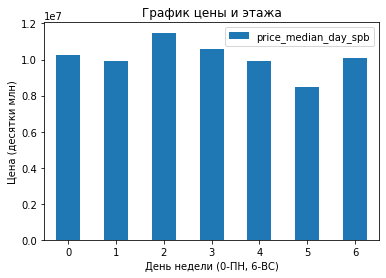

In [ ]:
day_spb = center.pivot_table(index='day', values='last_price', aggfunc=['median', 'count'])
day_spb.columns = ['price_median_day_spb', 'count']
day_spb.plot(y='price_median_day_spb', kind='bar', rot=0, title='График цены и этажа')
plt.xlabel('День недели (0-ПН, 6-ВС)')
plt.ylabel('Цена (десятки млн)')
plt.show()

In [ ]:
day_spb

,price_median_day_spb,count
day,,
0,10225000,42
1,9925000,44
2,11490000,53
3,10610000,58
4,9900000,63
5,8500000,19
6,10100000,16


На этот раз лидирует среда, а тогда был четверг.

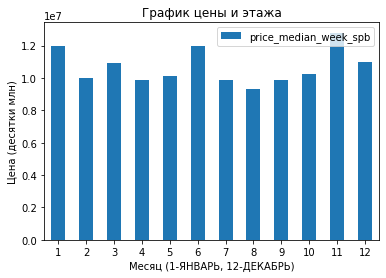

In [ ]:
week_spb = center.pivot_table(index='week', values='last_price', aggfunc=['median', 'count'])
week_spb.columns = ['price_median_week_spb', 'count']
week_spb.plot(y='price_median_week_spb', kind='bar', rot=0, title='График цены и этажа')
plt.xlabel('Месяц (1-ЯНВАРЬ, 12-ДЕКАБРЬ)')
plt.ylabel('Цена (десятки млн)')
plt.show()

In [ ]:
import statistics
data = [1, 1, 2, 3, 3, 3, 3, 4]
statistics.mode(data)

3

In [ ]:
week_spb

,price_median_week_spb,count
week,,
1,12000000,25
2,10000000,37
3,10950000,22
4,9875000,22
5,10100000,15
6,12000000,19
7,9850000,30
8,9300000,19
9,9900000,29


Сильнее всего преобладает 11 месяц.

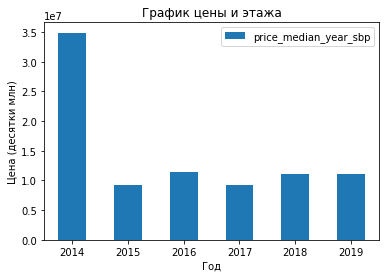

In [ ]:
year_sbp = center.pivot_table(index='year', values='last_price', aggfunc=['median', 'count'])
year_sbp.columns = ['price_median_year_sbp', 'count']
year_sbp.plot(y='price_median_year_sbp', kind='bar', rot=0, title='График цены и этажа')
plt.xlabel('Год')
plt.ylabel('Цена (десятки млн)')
plt.show()

In [ ]:
year_sbp

,price_median_year_sbp,count
year,,
2014,34878556,1
2015,9300000,38
2016,11395000,38
2017,9300000,113
2018,11000000,82
2019,11000000,23


Если не отбросить аномалию, будет преобладать 2014 год из-за одной проданной квартиры. Сделаю 2 графика.

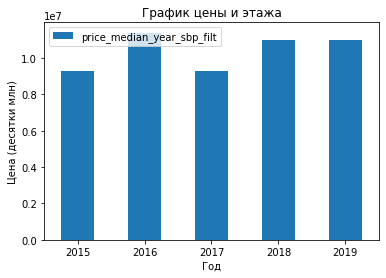

In [ ]:
year_sbp_filt = center.query('year > 2014')
year_sbp_filt = year_sbp_filt.pivot_table(index='year', values='last_price', aggfunc=['median', 'count'])
year_sbp_filt.columns = ['price_median_year_sbp_filt', 'count']
year_sbp_filt.plot(y='price_median_year_sbp_filt', kind='bar', rot=0, title='График цены и этажа')
plt.xlabel('Год')
plt.ylabel('Цена (десятки млн)')
plt.show()

Так гуд для исследования. 2016 год лидирует.

In [ ]:
year_sbp_filt

,price_median_year_sbp_filt,count
year,,
2015,9300000,38
2016,11395000,38
2017,9300000,113
2018,11000000,82
2019,11000000,23


**Сделайте выводы. Отличаются ли они от общих выводов по всему городу?**

Зависимость цены и комнат. Сравнение.

In [ ]:
final_rooms = rooms_spb.merge(rooms_old, on='id')
final_rooms.columns = ['price_median_rooms_spb', 'id', 'price_median_rooms_old']
final_rooms.corr()

,price_median_rooms_spb,id,price_median_rooms_old
price_median_rooms_spb,1.00,0.91,0.96
id,0.91,1.00,0.97
price_median_rooms_old,0.96,0.97,1.00


In [ ]:
center.rooms.corr(center.last_price)

0.44163894981901886

In [ ]:
norm_price.rooms.corr(norm_price.last_price)

0.5191676019066286

Зависимость от цены и комнаты вы наблюдаем следующую. Положительная корреляция и зависимость в питере от комнат есть, но она чуть меньше чем в общей таблице.

Зависимость цены от этажа. Сравнение.

In [ ]:
spb = center.floor.corr(center['last_price'])
old = norm_price.floor.corr(norm_price['last_price'])

In [ ]:
print('Зависимость цены от этажа:', old)
print('Зависимость цены от этажа в СПБ:', spb)

Зависимость цены от этажа: 0.06210218725189157
Зависимость цены от этажа в СПБ: 0.015382680858173299


По зависимости от этажа видим уже другие вещи. Преобладает конечно общая таблица, чем в питере. Видимо в Питере не так важен этаж как вид с него.

Зависимость цены от удаленности от центра. Сравнение.

In [ ]:
sbp = center.city_centers_nearest.corr(center.last_price)

In [ ]:
old = norm_rooms.city_centers_nearest.corr(norm_price['last_price'])

In [ ]:
print('Зависимость цены от от удаленности от центра:', old)
print('Зависимость цены от от удаленности от центра в СПБ:', spb)

Зависимость цены от от удаленности от центра: -0.4538799731259765
Зависимость цены от от удаленности от центра в СПБ: 0.015382680858173299


Зависимость от удаленности. Как и следовало ожидать в общей таблице чем дальше, тем дешевле. Вот в Республике Коми за 50м2 всего то 50тыс. руб. =) 

Зависимость цены и дата размещения и сраванение.

**В днях**

In [ ]:
spb = center.day.corr(center.last_price)

In [ ]:
old = norm_price.day.corr(norm_price.last_price)

In [ ]:
print('Зависимость цены и дня размещения:', old)
print('Зависимость цены и дня размещения в СПБ:', spb)

Зависимость цены и дня размещения: -0.01184204519898182
Зависимость цены и дня размещения в СПБ: -0.04174848550477213


Зависимость от дня недели никакой, одинакого почти, но мы помним, что лидер был в общей это среда, а лидер по СПБ это четверг.

**Месяц**

In [ ]:
spb = center.week.corr(center.last_price)

In [ ]:
old = norm_price.week.corr(norm_price.last_price)

In [ ]:
print('Зависимость цены и месяца размещения:', old)
print('Зависимость цены и месяца размещения: в СПБ:', spb)

Зависимость цены и месяца размещения: 0.004633046583869211
Зависимость цены и месяца размещения: в СПБ: 0.062017988040305845


Зависимость от месяца горадзо сильнее если считать в сотых. Ни какой.

**Год**

In [ ]:
sbp = center.year.corr(center.last_price)

In [ ]:
old = norm_price.year.corr(norm_price.last_price)

In [ ]:
print('Зависимость цены и года:', old)
print('Зависимость цены и года в СПБ:', spb)

Зависимость цены и года: -0.03759868455604987
Зависимость цены и года в СПБ: 0.062017988040305845


А зависимость от года разная, в общей пошла на спад даже. Это потому, что количество квартир выросло на продажу.

## Общий вывод

Что я сделал в этом проекте:
- прочитал и изучил таблицу.  

- обнаруженно пустые значения которые я заменял медиану, булевое значение, на 0 или 1 и на unknown в зависимости от характера пропуска.  
- После предобработки данных я сделал рассчеты: 
    1. цену квадратного метра;
    2. день недели, месяц и год публикации объявления;
    3. этаж квартиры; варианты — первый, последний, другой;
    4. соотношение жилой и общей площади, а также отношение площади кухни к общей.  
 и добавил их в таблицу, что бы в дальнейшем ими воспользоваться.
 
 
- Провел исследовательский анализ:
    - площади
    - цены
    - числа комнат
    - высота потолков
- Затем изучил зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.  
- Отсортировал таблицу по Санкт-Питербургу и изучил те же показания для сравнения с общей таблицей.

На рыночную стоимость недвижимости влияет удаленность объектов от центра города. В Питере это проявляется не сильно т.к. этот город популярный и является 2-ой столицей России. Там всегда есть спрос на недвижимость, даже далеко от центра. В других городах разница видна гораздо сильнее, чем дальше от центра города, тем дешевле.